In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\PROJECTS\healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df['smoking_status'] = df['smoking_status'].replace(['Unknown'],'NaN')

In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

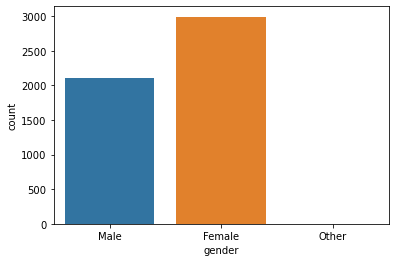

In [10]:
categoric = ['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']

sns.countplot(df['gender'])

In [11]:
df.drop(df.index[df['gender'] == 'Other'], inplace = True)

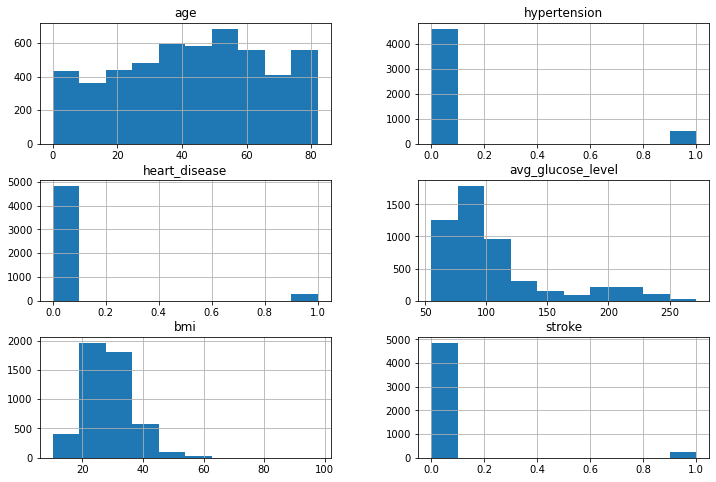

In [12]:
feature = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

df[feature].hist(figsize=(12, 8))
plt.show()

In [13]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


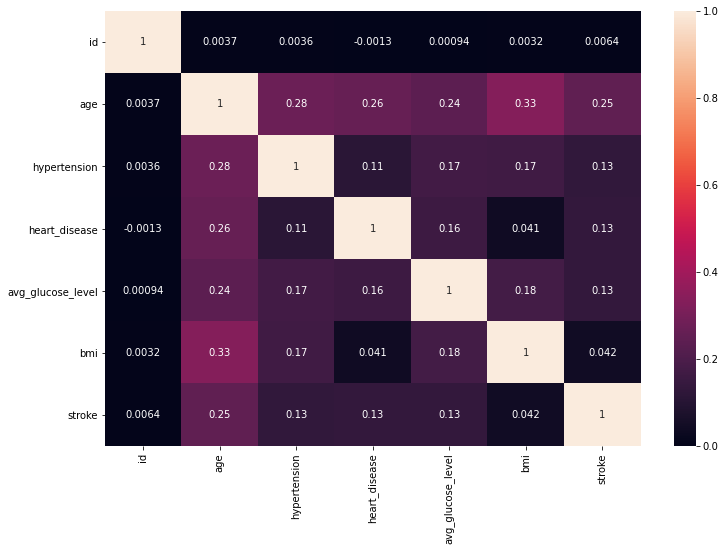

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [16]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [19]:
numerical_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('impute', SimpleImputer(strategy='mean'))
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder()),
    ('impute', SimpleImputer(strategy='most_frequent'))
])

In [20]:
preprocessing = ColumnTransformer([
    ('numeric', numerical_pipeline, ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']),
    ('categoric', categorical_pipeline, ['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'])
])

In [21]:
pipeline = Pipeline([
    ('pre', preprocessing),
    ('algo', RandomForestClassifier(random_state=42))
])

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   SimpleImputer())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder()),
                                                                  ('impute',
           

In [23]:
pipeline.get_params()

{'memory': None,
 'steps': [('pre', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('scaling', StandardScaler()),
                                                    ('impute', SimpleImputer())]),
                                    ['age', 'hypertension', 'heart_disease',
                                     'avg_glucose_level', 'bmi']),
                                   ('categoric',
                                    Pipeline(steps=[('onehot', OneHotEncoder()),
                                                    ('impute',
                                                     SimpleImputer(strategy='most_frequent'))]),
                                    ['gender', 'ever_married', 'work_type',
                                     'Residence_type', 'smoking_status'])])),
  ('algo', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'pre': ColumnTransformer(transformers=[('numeric',
                                  Pipelin

In [24]:
parameter = {
    'algo__n_estimators':[100,200, 350, 500], 
    'algo__min_samples_leaf':[2, 10, 30]
}

In [25]:
model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler()),
                                                                                         ('impute',
                                                                                          SimpleImputer())]),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'avg_glucose_level',
                                                                         

In [26]:
print(model.score(X_train, y_train)), print(model.score(X_test, y_test))

0.9571813065818449
0.9510763209393346


(None, None)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [28]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f_acc = f1_score(y_test, y_pred)

print(accuracy)
print(f_acc)

0.9510763209393346
0.0
